# Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [3]:
murder_data = pd.read_excel("../Data/murder(2016-2021)/STATE-UT wise murder data(2021-2015)reg.xlsx")

In [4]:
murder_data.tail()

,Unnamed: 0,Sl. No.,State/UT,2015,2016,2017,2018,2019,2020,2021,Region,Region Pop(in_bill)
31,32,32,Delhi,598,528.0,487.0,513.0,521.0,472,459,N,1.024
32,33,33,Jammu and Kashmir,169,142.0,152.0,181.0,119.0,149,136,N,1.024
33,34,34,Ladakh,0,NaN,NaN,NaN,NaN,0,5,N,1.024
34,35,35,Lakshadweep,0,0.0,0.0,1.0,0.0,0,1,S,1.768
35,36,36,Puducherry,33,33.0,25.0,29.0,29.0,39,19,S,1.768


In [5]:
murder_data.fillna(0)
df = murder_data

In [6]:
col_sums = df.sum(axis='index')
type(col_sums)

pandas.core.series.Series

In [7]:
col_sums

Unnamed: 0                                                           638
Sl. No.                                                              666
State/UT               Andhra PradeshArunachal PradeshAssamBiharChhat...
2015                                                               33078
2016                                                             30450.0
2017                                                             28653.0
2018                                                             29017.0
2019                                                             28915.0
2020                                                               29193
2021                                                               29272
Region                      SNENEECWWNNESSCWNENENENEENNNESSNECCESNWNNNSS
Region Pop(in_bill)                                               44.652
dtype: object

In [8]:
 y = col_sums.drop(labels = ['Unnamed: 0','Sl. No.','State/UT','Region','Region Pop(in_bill)'])

In [9]:
y1 = y.tolist()
y1

[33078, 30450.0, 28653.0, 29017.0, 28915.0, 29193, 29272]

In [10]:
x = list(range(2015,2022))
x

[2015, 2016, 2017, 2018, 2019, 2020, 2021]

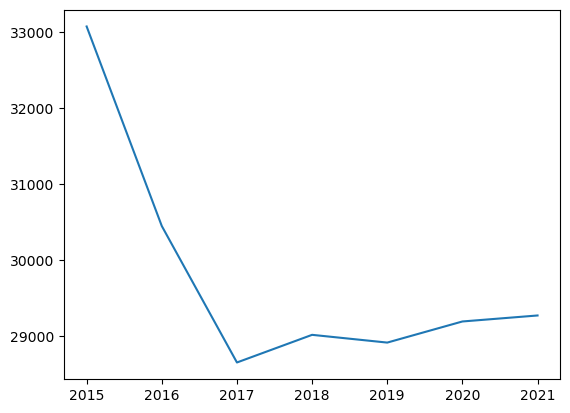

In [11]:
plt.plot(x,y1)

In [12]:
import statsmodels.api as sm

reg = sm.OLS(y1,sm.add_constant(x)).fit()
print(reg.summary())
y2 = np.log(np.array(y1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     4.249
Date:                Thu, 25 Apr 2024   Prob (F-statistic):             0.0943
Time:                        21:22:41   Log-Likelihood:                -58.689
No. Observations:                   7   AIC:                             121.4
Df Residuals:                       5   BIC:                             121.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.015e+06   4.78e+05      2.124      0.0

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [13]:
reg2 = sm.OLS(y2,sm.add_constant(x)).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     4.215
Date:                Thu, 25 Apr 2024   Prob (F-statistic):             0.0953
Time:                        21:22:42   Log-Likelihood:                 13.660
No. Observations:                   7   AIC:                            -23.32
Df Residuals:                       5   BIC:                            -23.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.1510     15.513      2.717      0.0

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [14]:
reg3 = sm.OLS(y1,sm.add_constant(np.exp(-1*np.array(x)))).fit()
print(reg3.summary())

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                nan
Time:                        21:22:42   Log-Likelihood:                -60.842
No. Observations:                   7   AIC:                             123.7
Df Residuals:                       6   BIC:                             123.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.98e+04    588.114     50.665      0.0

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [15]:
y3 = np.exp(42.1510 -0.0158*np.array(x))
y3

array([30151.80295892, 29679.14827691, 29213.90285161, 28755.95053674,
       28305.1770067 , 27861.46972805, 27424.71793139])

In [16]:
y = -488.2143 * np.array(x) + 1.015e+06
y

array([31248.1855, 30759.9712, 30271.7569, 29783.5426, 29295.3283,
       28807.114 , 28318.8997])

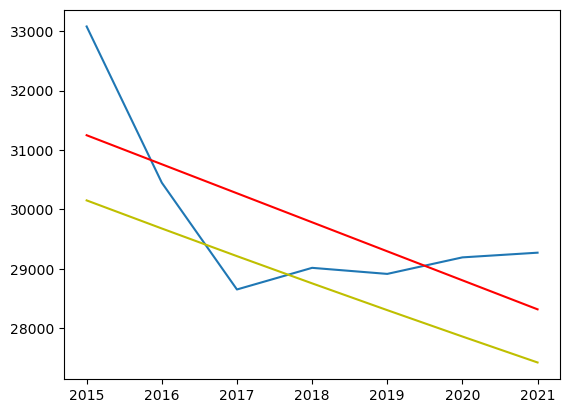

In [17]:
plt.plot(x, y1)
plt.plot(x,y, 'r')
plt.plot(x,y3,'y')

In [27]:
ne_murders = 11652
ri_murders = 51484+55199+23970+37583+23290
n1=310267463
n2=2154851930+1596830277+1024339313+1768422355+1209296200
p1 = ne_murders/n1
p2 = ri_murders/n2
p = (n1*p1+n2*p2)/(n1+n2)
z_obs = (p1-p2)/math.sqrt(p*(1-p)*(1/n1 + 1/n2))
z_obs

44.229811510135654

In [29]:
from scipy.stats import norm
1 - norm.cdf(z_obs)

0.0

In [19]:

data = pd.DataFrame({
    "Murders": [ne_murders,ri_murders],
    "Population": [n1-ne_murders,n2-ri_murders]
})

In [20]:
import scipy.stats as ss
(chi2, p, df, arr) = ss.chi2_contingency(data, correction = False)

In [21]:
chi2 , p ,df, arr

(21939.833240476142,
 0.0,
 1,
 array([[9.74247405e+04, 1.89679643e+09],
        [3.19735259e+05, 6.22503788e+09]]))

In [22]:
from scipy.stats import norm

p_val = 1 - norm.cdf(z_obs)
p_val

1.0

In [23]:
df = murder_data
dfc = np.array(df[df['Region']  == "C"].fillna(0).sum(axis="index").drop(
    labels = ['Unnamed: 0','Sl. No.','State/UT','Region','Region Pop(in_bill)']))
dfs = np.array(df[df['Region']  == "S"].fillna(0).sum(axis="index").drop(
    labels = ['Unnamed: 0','Sl. No.','State/UT','Region','Region Pop(in_bill)']))
dfn = np.array(df[df['Region']  == "N"].fillna(0).sum(axis="index").drop(
    labels = ['Unnamed: 0','Sl. No.','State/UT','Region','Region Pop(in_bill)']))
dfe = np.array(df[df['Region']  == "E"].fillna(0).sum(axis="index").drop(
    labels = ['Unnamed: 0','Sl. No.','State/UT','Region','Region Pop(in_bill)']))
dfw = np.array(df[df['Region']  == "W"].fillna(0).sum(axis="index").drop(
    labels = ['Unnamed: 0','Sl. No.','State/UT','Region','Region Pop(in_bill)']))
dfne = np.array(df[df['Region']  == "NE"].fillna(0).sum(axis="index").drop(
    labels = ['Unnamed: 0','Sl. No.','State/UT','Region','Region Pop(in_bill)']))

In [24]:
from scipy.stats.stats import pearsonr, spearmanr

pearsonr(dfc,dfs)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13288\3895334724.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, spearmanr
C:\Users\Admin\AppData\Local\Temp\ipykernel_13288\3895334724.py:1: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, spearmanr


PearsonRResult(statistic=0.8877110444888117, pvalue=0.007632353763143639)

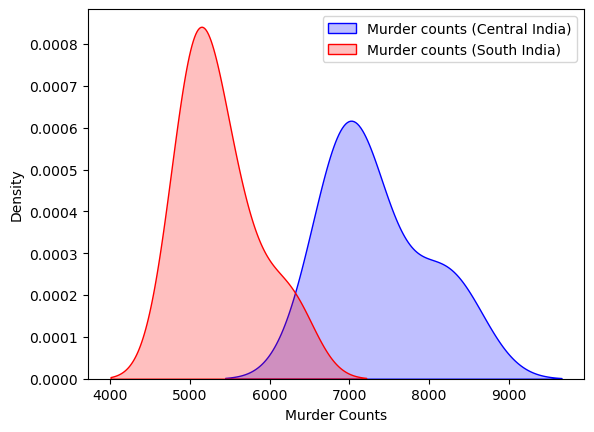

In [25]:
central = df[df['Region']=='C'][[2015,2016,2017,2018,2019,2020,2021]].to_numpy()

sns.kdeplot(dfc,color='b', fill=True, label='Murder counts (Central India)')
sns.kdeplot(dfs,color='r', fill=True, label='Murder counts (South India)')
plt.xlabel("Murder Counts")
plt.legend()

In [36]:
all_india = pd.DataFrame(
    {
        "North" : [4256,4176,3941,4109,4211,4353,4324],
        "West" : [3837,3428,3082,3283,3148,3158,3354],
        "South" : [6259,5637,5142,4957,5133,4997,5398],
        "North-East" : [1977,1638,1598,1686,1660,1513,1580],
        "East" : [8357,7467,7558,7957,8050,8160,7650],
        "Central" : [8392,8044,7332,7025,6713,7012,6966,]
    }
)
all_india['India'] = all_india.sum(axis=1)

In [37]:
all_india

,North,West,South,North-East,East,Central,India
0,4256,3837,6259,1977,8357,8392,33078
1,4176,3428,5637,1638,7467,8044,30390
2,3941,3082,5142,1598,7558,7332,28653
3,4109,3283,4957,1686,7957,7025,29017
4,4211,3148,5133,1660,8050,6713,28915
5,4353,3158,4997,1513,8160,7012,29193
6,4324,3354,5398,1580,7650,6966,29272


<Axes: >

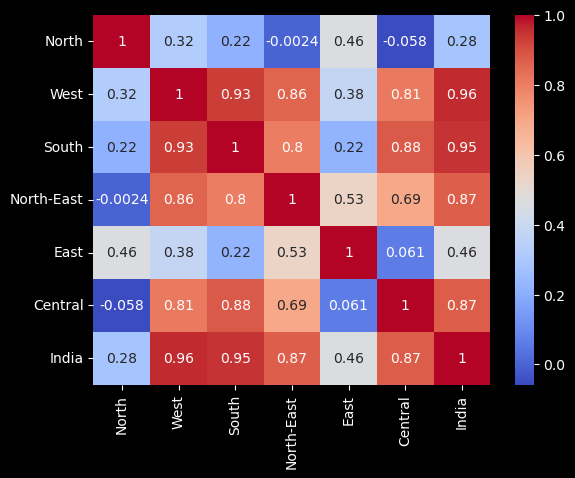

In [46]:
plt.style.use("dark_background")
sns.heatmap(all_india.corr(),annot=True,cmap='coolwarm')